In [ ]:
from numpy import power, sin, cos, linspace, pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.precision", 3)

In [ ]:
def graph_maker(point=None, a=None, b=None):
  A = -10
  B = 10
  numbers = linspace(A, B, 10000)
  fig, ax = plt.subplots(figsize = (10, 5))
  if point is not None:
    ax.scatter(point, function(point))
    ax.axvline(x=a, color='black', linestyle='--')
    ax.axvline(x=b, color='black', linestyle='--')
  ax.plot(numbers, function(numbers))
  ax.set_xlabel("x")
  ax.set_ylabel("f(x)")
  ax.set_title("Plot of the function")
  ax.grid(True)
  plt.show()

In [ ]:
# define the function of interest
def function(x):
    return power(x, 3) * cos(x) * sin(x) + 3 * power(x, 2) * sin(x) - 3 * x

$$
{x \text{_current}}: X^k
$$

$$
{x \text{_previous}} = X^{(k-1)}
$$

$$
{x\text{_next}} = X^{(k+1)}
$$

In [ ]:
# create a function to calculate the rate |x(k+1) - x(k)| / |x(k) - x(k-1)|
def linear_convergance(x_previous, x_current, x_next, order=1):
  return abs((x_next - x_current)) / power(abs(x_current - x_previous), order)

In [ ]:
# create a function to calculate -log|x(k+1) - x(k)| + log|x(k) - x(k-1)|
from math import log
def digit_agreement(x_previous, x_current, x_next):
  return -log(abs(x_next - x_current)) + log(abs(x_current - x_previous))

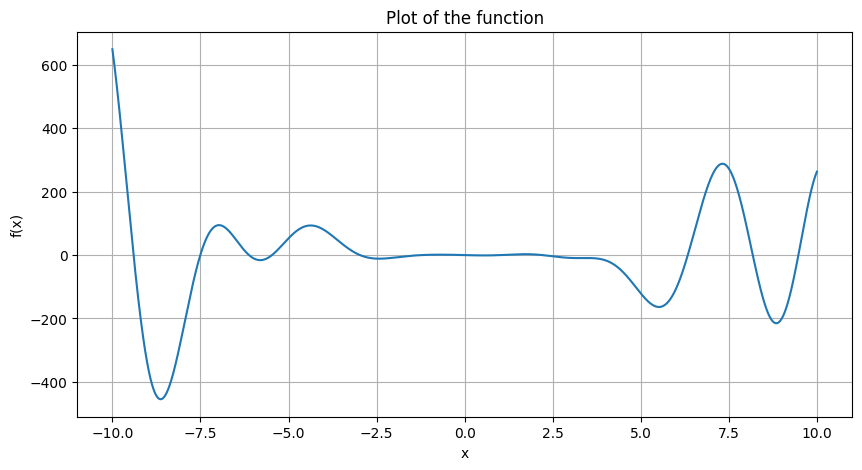

In [ ]:
graph_maker()

In [ ]:
def bisection_search(a, b, eps):

  # creating a dataframe so that we can keep track of the variables
  df = pd.DataFrame(columns=["iteration", "a", "b", "x", "fx", "convergance_rate", "digit_agreement"])

  # variable initilization
  x_previous = None
  # initializeing x0
  x_current = (a + b) / 2
  x_next = None
  # Initializing the # of iterations
  iteration = 0

  # starting the track
  df.loc[iteration] = [iteration, a, b, None, None, None, None]

  # actual algorithm

  # if the difference of a and b is smaller than epsilon, then stop
  while abs(b - a) >= eps:
    # if f(x) is decreasing
    if function(x_current) >= function(x_current + eps):
      # then assign x as the new a value
      a = x_current
    else:
      # otherwise, assign x as the new b value
      b = x_current

    # create a new x value using the updated a and b values
    x_next = (a + b) / 2
    # update the number of iterations
    iteration+=1

    # update the dataframe
    if iteration > 1:
      df.loc[iteration] = [iteration, a, b, x_current, function(x_current), linear_convergance(x_previous, x_current, x_next), digit_agreement(x_previous, x_current, x_next)]
    else:
      df.loc[iteration] = [iteration, a, b, x_current, function(x_current), None, None]

    # parameter assigning for next iteration
    x_previous = x_current
    x_current = x_next

  return df, x_current

In [ ]:
def pipeline(a, b, eps):
  df, point = bisection_search(a, b, eps)
  graph_maker(point, a, b)
  return df

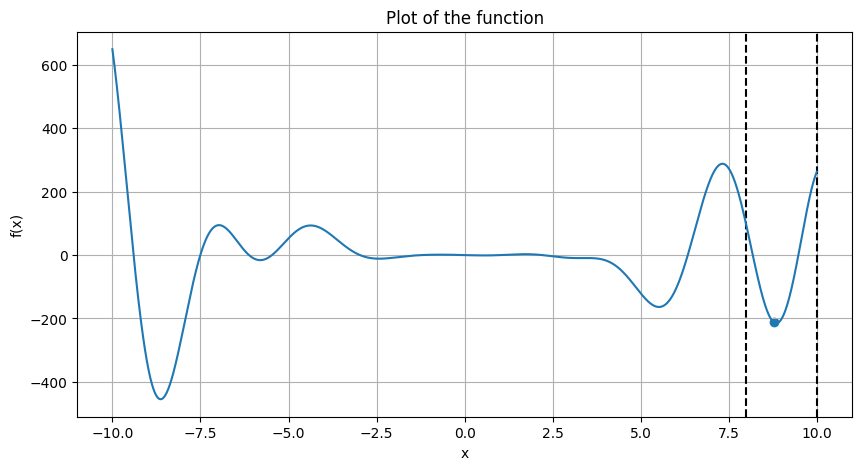

,iteration,a,b,x,fx,convergance_rate,digit_agreement
0,0.0,8.00,10.000,NaN,NaN,NaN,NaN
1,1.0,8.00,9.000,9.000,-200.590,NaN,NaN
2,2.0,8.50,9.000,8.500,-147.637,0.5,0.693
3,3.0,8.75,9.000,8.750,-209.555,0.5,0.693
4,4.0,8.75,8.875,8.875,-214.587,0.5,0.693
5,5.0,8.75,8.812,8.812,-214.419,0.5,0.693


In [ ]:
pipeline(8, 10, 1e-1)

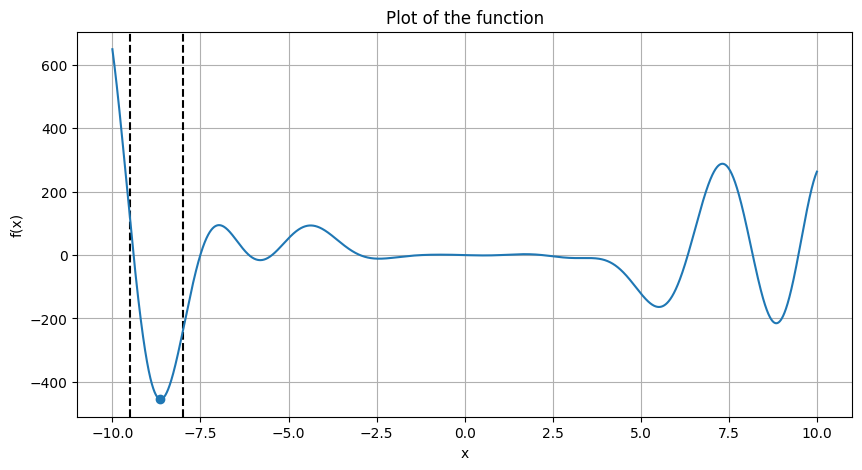

,iteration,a,b,x,fx,convergance_rate,digit_agreement
0,0.0,-9.500,-8.000,NaN,NaN,NaN,NaN
1,1.0,-8.750,-8.000,-8.750,-444.038,NaN,NaN
2,2.0,-8.750,-8.375,-8.375,-410.979,0.5,0.693
3,3.0,-8.750,-8.562,-8.562,-451.509,0.5,0.693
4,4.0,-8.656,-8.562,-8.656,-454.404,0.5,0.693
5,5.0,-8.656,-8.609,-8.609,-454.548,0.5,0.693
6,6.0,-8.656,-8.633,-8.633,-454.883,0.5,0.693
7,7.0,-8.645,-8.633,-8.645,-454.746,0.5,0.693
8,8.0,-8.639,-8.633,-8.639,-454.840,0.5,0.693


In [ ]:
pipeline(-9.5, -8,1e-2)

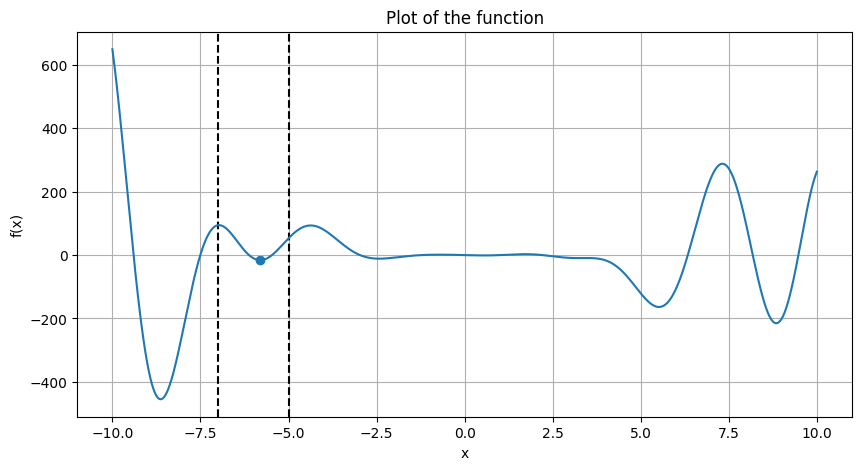

,iteration,a,b,x,fx,convergance_rate,digit_agreement
0,0.0,-7.000,-5.000,NaN,NaN,NaN,NaN
1,1.0,-6.000,-5.000,-6.000,-9.773,NaN,NaN
2,2.0,-6.000,-5.500,-5.500,-2.659,0.5,0.693
3,3.0,-6.000,-5.750,-5.750,-15.551,0.5,0.693
4,4.0,-5.875,-5.750,-5.875,-15.152,0.5,0.693
5,5.0,-5.812,-5.750,-5.812,-15.970,0.5,0.693
6,6.0,-5.812,-5.781,-5.781,-15.913,0.5,0.693
7,7.0,-5.812,-5.797,-5.797,-15.980,0.5,0.693
8,8.0,-5.805,-5.797,-5.805,-15.985,0.5,0.693
9,9.0,-5.805,-5.801,-5.801,-15.985,0.5,0.693


In [ ]:
pipeline(-7, -5, 1e-3)

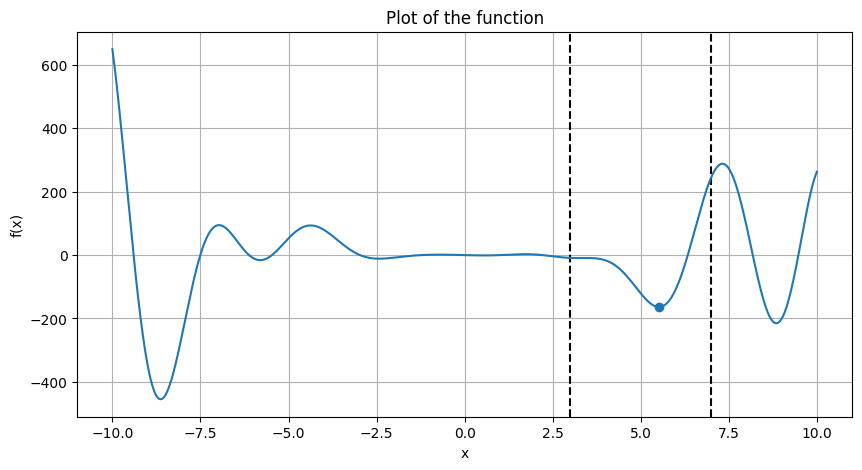

,iteration,a,b,x,fx,convergance_rate,digit_agreement
0,0.0,3.000,7.000,NaN,NaN,NaN,NaN
1,1.0,5.000,7.000,5.000,-120.921,NaN,NaN
2,2.0,5.000,6.000,6.000,-106.127,0.5,0.693
3,3.0,5.500,6.000,5.500,-163.714,0.5,0.693
4,4.0,5.500,5.750,5.750,-150.881,0.5,0.693
5,5.0,5.500,5.625,5.625,-161.062,0.5,0.693
6,6.0,5.500,5.562,5.562,-163.278,0.5,0.693
7,7.0,5.500,5.531,5.531,-163.711,0.5,0.693
8,8.0,5.500,5.516,5.516,-163.766,0.5,0.693
9,9.0,5.508,5.516,5.508,-163.753,0.5,0.693


In [ ]:
pipeline(3, 7, 1e-4)

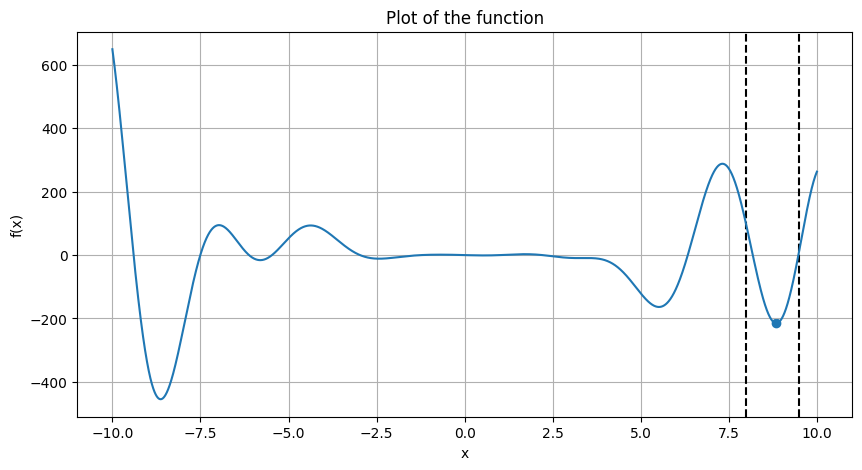

,iteration,a,b,x,fx,convergance_rate,digit_agreement
0,0.0,8.000,9.500,NaN,NaN,NaN,NaN
1,1.0,8.750,9.500,8.750,-209.555,NaN,NaN
2,2.0,8.750,9.125,9.125,-167.976,0.5,0.693
3,3.0,8.750,8.938,8.938,-209.976,0.5,0.693
4,4.0,8.844,8.938,8.844,-215.097,0.5,0.693
5,5.0,8.844,8.891,8.891,-213.884,0.5,0.693
6,6.0,8.844,8.867,8.867,-214.826,0.5,0.693
7,7.0,8.844,8.855,8.855,-215.046,0.5,0.693
8,8.0,8.844,8.850,8.850,-215.092,0.5,0.693
9,9.0,8.844,8.847,8.847,-215.100,0.5,0.693


In [ ]:
pipeline(8, 9.5, 1e-4)